In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_excel("data/ireland_hospital_c19_stats.xlsx", sheet_name=0)

df = df[0:22]
df

,date,c19_icu_cases,new_deaths,available_icu_beds,c19_ventilated_cases
0,2020-04-13 00:00:00,144.0,31.0,135.0,105.0
1,2020-04-14 00:00:00,147.0,41.0,133.0,99.0
2,2020-04-15 00:00:00,142.0,38.0,127.0,94.0
3,2020-04-16 00:00:00,138.0,42.0,115.0,90.0
4,2020-04-17 00:00:00,132.0,44.0,126.0,88.0
5,2020-04-18 00:00:00,140.0,41.0,132.0,94.0
6,2020-04-19 00:00:00,138.0,39.0,142.0,91.0
7,2020-04-20 00:00:00,138.0,77.0,140.0,94.0
8,2020-04-21 00:00:00,132.0,44.0,133.0,88.0
9,2020-04-22 00:00:00,130.0,38.0,140.0,87.0


<IPython.core.display.Javascript object>


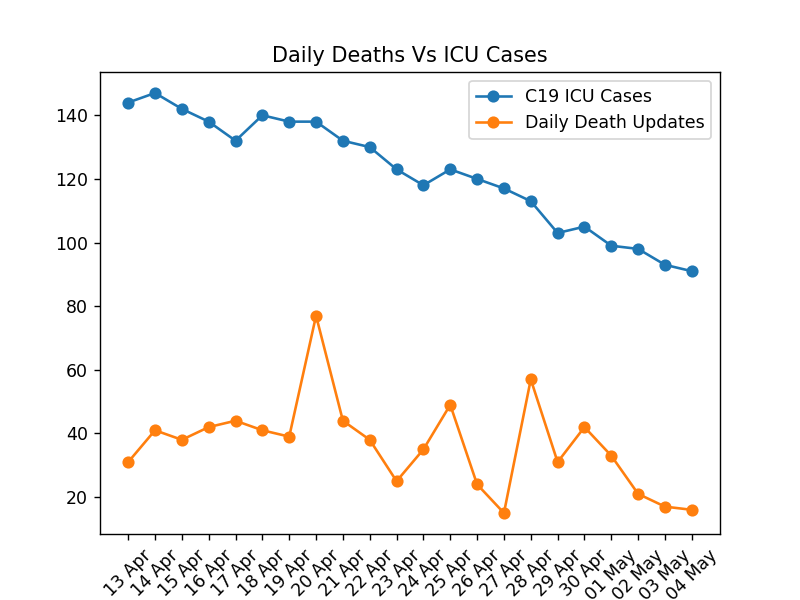

In [195]:
# ICU Cases vs Deaths
x = df['date']
fig,ax = plt.subplots()
plt.title("Daily Deaths Vs ICU Cases")
plt.plot(x, df['c19_icu_cases'], label="C19 ICU Cases",  marker='o')
plt.plot(x, df['new_deaths'], label='Daily Death Updates', marker='o')
#plt.plot(x, df['available_icu_beds'], label='Available ICU Beds', marker='o')
monthyearFmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(monthyearFmt)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.legend()
plt.minorticks_off()
plt.show()
plt.savefig("output/daily_deaths_vs_icu.png")

<IPython.core.display.Javascript object>


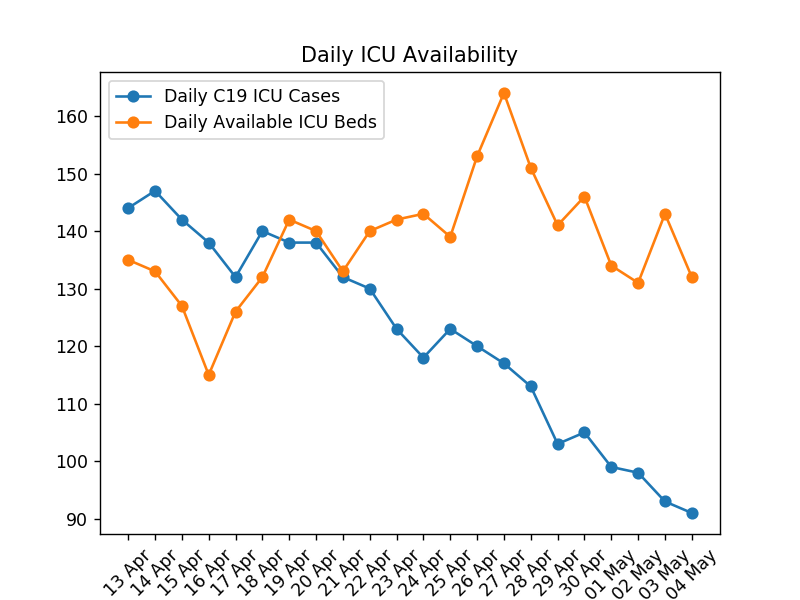

In [196]:
# ICU Availability
fig,ax = plt.subplots()
plt.title("Daily ICU Availability")
plt.plot(x, df['c19_icu_cases'], label="Daily C19 ICU Cases",  marker='o')
plt.plot(x, df['available_icu_beds'], label='Daily Available ICU Beds', marker='o')
monthyearFmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(monthyearFmt)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.legend()
plt.minorticks_off()
plt.show()
plt.savefig("output/daily_icu_avail.png")

<IPython.core.display.Javascript object>


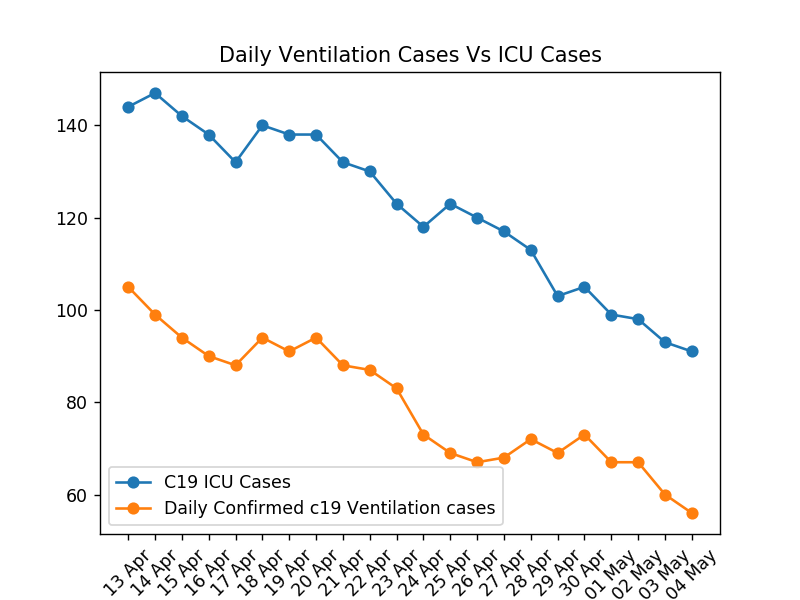

In [197]:
# ICU Cases Vs Ventilation Case
fig,ax = plt.subplots()
plt.title("Daily Ventilation Cases Vs ICU Cases")
plt.plot(x, df['c19_icu_cases'], label="C19 ICU Cases",  marker='o')
plt.plot(x, df['c19_ventilated_cases'], label='Daily Confirmed c19 Ventilation cases', marker='o')
monthyearFmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(monthyearFmt)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.legend()
plt.minorticks_off()
plt.show()
plt.savefig("output/daily_ventilation_vs_icu.png")

In [198]:
df_hspc = pd.read_csv("http://opendata-geohive.hub.arcgis.com/datasets/d8eb52d56273413b84b0187a4e9117be_0.csv?outSR={%22latestWkid%22:3857,%22wkid%22:102100}")
df_hspc['Date'] = pd.to_datetime(df_hspc['Date'], unit='ms') # csv file date format was changed to milliseconds
df_hspc['Datestr'] = df_hspc['Date'].dt.strftime('%d/%m')
# add new hospital admissions
HospitalisedAged5 = df_hspc["HospitalisedAged5"].diff().clip(0)
df_hspc.insert(14, "HospitalisedAged5_new", HospitalisedAged5)

HospitalisedAged5to14 = df_hspc["HospitalisedAged5to14"].diff().clip(0)
df_hspc.insert(16, "HospitalisedAged5to14_new", HospitalisedAged5to14)
# HospitalisedAged15to24
HospitalisedAged15to24 = df_hspc["HospitalisedAged15to24"].diff().clip(0)
df_hspc.insert(18, "HospitalisedAged15to24_new", HospitalisedAged15to24)
# HospitalisedAged25to34
HospitalisedAged25to34 = df_hspc["HospitalisedAged25to34"].diff().clip(0)
df_hspc.insert(20, "HospitalisedAged25to34_new", HospitalisedAged25to34)
# HospitalisedAged35to44
HospitalisedAged35to44 = df_hspc["HospitalisedAged35to44"].diff().clip(0)
df_hspc.insert(22, "HospitalisedAged35to44_new", HospitalisedAged35to44)
# HospitalisedAged45to54
HospitalisedAged45to54 = df_hspc["HospitalisedAged45to54"].diff().clip(0)
df_hspc.insert(24, "HospitalisedAged45to54_new", HospitalisedAged45to54)
# HospitalisedAged55to64
HospitalisedAged55to64 = df_hspc["HospitalisedAged55to64"].diff().clip(0)
df_hspc.insert(26, "HospitalisedAged55to64_new", HospitalisedAged55to64)
# HospitalisedAged65up
HospitalisedAged65up = df_hspc["HospitalisedAged65up"].diff().clip(0)
df_hspc.insert(28, "HospitalisedAged65up_new", HospitalisedAged65up)

df_hspc = df_hspc.tail(30)
df_hspc


,Date,ConfirmedCovidCases,TotalConfirmedCovidCases,ConfirmedCovidDeaths,TotalCovidDeaths,ConfirmedCovidRecovered,TotalCovidRecovered,StatisticsProfileDate,CovidCasesConfirmed,HospitalisedCovidCases,RequiringICUCovidCases,HealthcareWorkersCovidCases,ClustersNotified,HospitalisedAged5,HospitalisedAged5_new,HospitalisedAged5to14,HospitalisedAged5to14_new,HospitalisedAged15to24,HospitalisedAged15to24_new,HospitalisedAged25to34,HospitalisedAged25to34_new,HospitalisedAged35to44,HospitalisedAged35to44_new,HospitalisedAged45to54,HospitalisedAged45to54_new,HospitalisedAged55to64,HospitalisedAged55to64_new,HospitalisedAged65up,HospitalisedAged65up_new,Male,Female,Unknown,Aged1,Aged1to4,Aged5to14,Aged15to24,Aged25to34,Aged35to44,Aged45to54,Aged55to64,Aged65up,Median_Age,CommunityTransmission,CloseContact,TravelAbroad,UnderInvestigation,FID,Datestr
35,2020-04-06,370,5364,16,174,0,0,1585958400000,4916.0,1265.0,169.0,1263.0,260.0,3.0,0.0,7.0,3.0,35.0,0.0,93.0,5.0,111.0,5.0,188.0,5.0,191.0,6.0,635.0,42.0,2235.0,2633.0,48.0,11.0,13.0,36.0,287.0,820.0,902.0,907.0,697.0,1229.0,49.0,65.0,23.0,12.0,2802.0,1639,06/04
36,2020-04-07,345,5709,36,210,0,0,1586044800000,5593.0,1345.0,194.0,1388.0,270.0,7.0,4.0,3.0,0.0,36.0,1.0,96.0,3.0,116.0,5.0,201.0,13.0,207.0,16.0,677.0,42.0,2594.0,2946.0,53.0,12.0,18.0,39.0,347.0,948.0,1044.0,1048.0,794.0,1326.0,48.0,67.0,22.0,11.0,3342.0,1640,07/04
37,2020-04-08,365,6074,25,235,0,0,1586131200000,5981.0,1472.0,224.0,1568.0,299.0,7.0,0.0,4.0,1.0,37.0,1.0,102.0,6.0,127.0,11.0,224.0,23.0,230.0,23.0,739.0,62.0,2757.0,3154.0,70.0,12.0,18.0,42.0,364.0,1010.0,1111.0,1118.0,847.0,1442.0,48.0,67.0,23.0,10.0,3452.0,1641,08/04
38,2020-04-09,500,6574,28,263,0,0,1586217600000,6444.0,1521.0,230.0,1765.0,317.0,9.0,2.0,4.0,0.0,37.0,0.0,103.0,1.0,130.0,3.0,231.0,7.0,237.0,7.0,768.0,29.0,2923.0,3425.0,96.0,14.0,19.0,43.0,384.0,1103.0,1176.0,1219.0,922.0,1544.0,48.0,67.0,24.0,9.0,3626.0,1642,09/04
39,2020-04-10,480,7054,25,287,0,0,1586304000000,7071.0,1631.0,244.0,1949.0,339.0,10.0,1.0,4.0,0.0,39.0,2.0,115.0,12.0,137.0,7.0,249.0,18.0,256.0,19.0,819.0,51.0,3211.0,3788.0,72.0,16.0,20.0,45.0,423.0,1220.0,1304.0,1339.0,1015.0,1670.0,48.0,66.0,25.0,9.0,4035.0,1643,10/04
40,2020-04-11,553,8928,33,320,0,0,1586390400000,7787.0,1718.0,253.0,2141.0,356.0,10.0,0.0,4.0,0.0,41.0,2.0,119.0,4.0,144.0,7.0,256.0,7.0,271.0,15.0,871.0,52.0,3489.0,4212.0,86.0,18.0,22.0,52.0,473.0,1343.0,1418.0,1479.0,1138.0,1825.0,48.0,66.0,26.0,8.0,4525.0,1644,11/04
41,2020-04-12,430,9655,14,334,0,0,1586476800000,8496.0,1777.0,261.0,2312.0,382.0,10.0,0.0,5.0,1.0,43.0,2.0,123.0,4.0,146.0,2.0,263.0,7.0,279.0,8.0,906.0,35.0,3783.0,4616.0,97.0,18.0,27.0,56.0,528.0,1479.0,1558.0,1609.0,1251.0,1951.0,48.0,67.0,26.0,7.0,5047.0,1645,12/04
42,2020-04-13,527,10647,31,365,0,0,1586563200000,9484.0,1849.0,268.0,2489.0,401.0,11.0,1.0,5.0,0.0,44.0,1.0,125.0,2.0,150.0,4.0,272.0,9.0,287.0,8.0,953.0,47.0,4225.0,5115.0,144.0,19.0,29.0,67.0,598.0,1647.0,1757.0,1812.0,1411.0,2123.0,48.0,66.0,27.0,7.0,5783.0,1646,13/04
43,2020-04-14,548,11479,41,406,0,0,1586649600000,10385.0,1903.0,275.0,2707.0,408.0,12.0,1.0,5.0,0.0,43.0,0.0,127.0,2.0,154.0,4.0,278.0,6.0,293.0,6.0,989.0,36.0,4617.0,5629.0,139.0,22.0,34.0,81.0,674.0,1805.0,1927.0,1983.0,1522.0,2316.0,48.0,66.0,27.0,7.0,5783.0,1647,14/04
44,2020-04-15,657,12547,38,444,0,0,1586736000000,11261.0,1968.0,280.0,2872.0,413.0,13.0,1.0,4.0,0.0,43.0,0.0,130.0,3.0,159.0,5.0,288.0,10.0,301.0,8.0,1028.0,39.0,5021.0,6140.0,100.0,25.0,36.0,96.0,737.0,1950.0,2084.0,2157.0,1637.0,2520.0,48.0,52.0,42.0,6.0,5939.0,1648,15/04


<IPython.core.display.Javascript object>


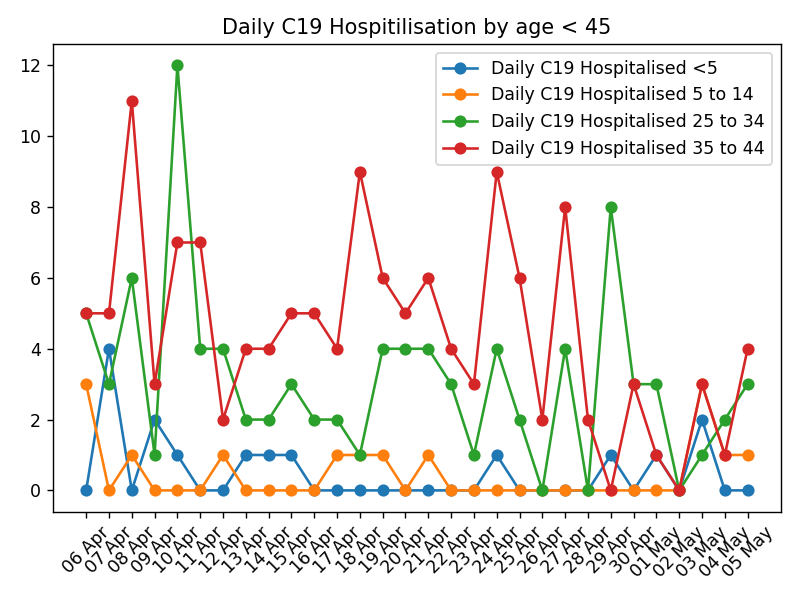

In [199]:
# Daily C19 Hospitilisation by age < 45
x = df_hspc['Date']
fig,ax = plt.subplots()
plt.title("Daily C19 Hospitilisation by age < 45")
plt.plot(x, df_hspc['HospitalisedAged5_new'], label='Daily C19 Hospitalised <5', marker='o')
plt.plot(x, df_hspc['HospitalisedAged5to14_new'], label='Daily C19 Hospitalised 5 to 14', marker='o')
plt.plot(x, df_hspc["HospitalisedAged25to34_new"], label='Daily C19 Hospitalised 25 to 34', marker='o')
plt.plot(x, df_hspc["HospitalisedAged35to44_new"], label='Daily C19 Hospitalised 35 to 44', marker='o')

monthyearFmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(monthyearFmt)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.legend()
plt.minorticks_off()
plt.tight_layout()
plt.show()
plt.savefig("output/hospatilsation_daily_by_age_less_than_45.png")

<IPython.core.display.Javascript object>


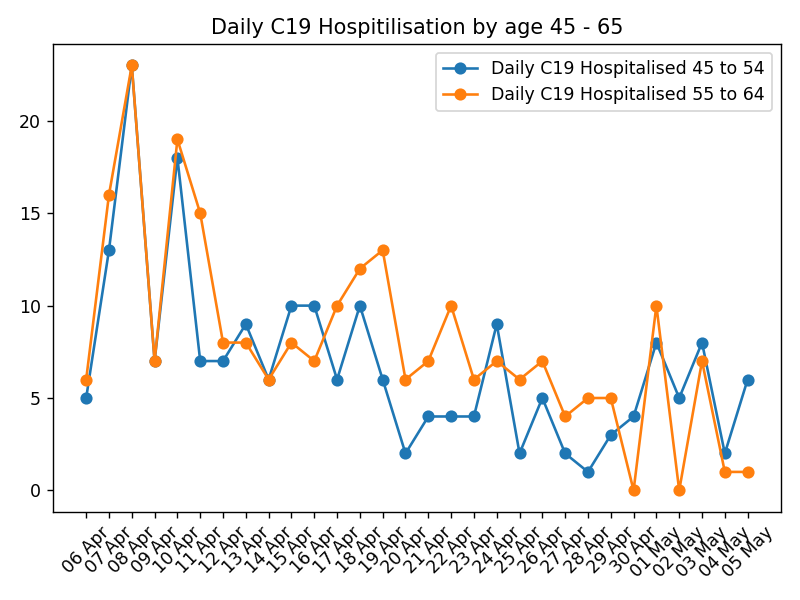

In [200]:
# Daily C19 Hospitilisation by age 45 - 65
x = df_hspc['Date']
fig,ax = plt.subplots()
plt.title("Daily C19 Hospitilisation by age 45 - 65")
plt.plot(x, df_hspc["HospitalisedAged45to54_new"], label='Daily C19 Hospitalised 45 to 54', marker='o')
plt.plot(x, df_hspc["HospitalisedAged55to64_new"], label='Daily C19 Hospitalised 55 to 64', marker='o')

monthyearFmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(monthyearFmt)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.legend()
plt.minorticks_off()
plt.tight_layout()
plt.show()
plt.savefig("output/hospatilsation_daily_by_age_greater_than_45.png")

<IPython.core.display.Javascript object>


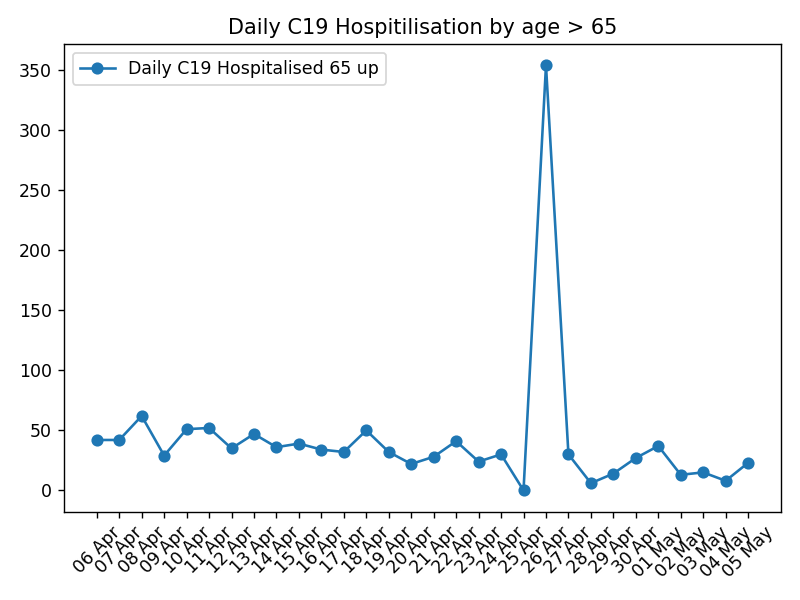

In [201]:
# Daily C19 Hospitilisation by age > 65
x = df_hspc['Date']
fig,ax = plt.subplots()
plt.title("Daily C19 Hospitilisation by age > 65")
plt.plot(x, df_hspc["HospitalisedAged65up_new"], label='Daily C19 Hospitalised 65 up', marker='o')

monthyearFmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(monthyearFmt)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.legend()
plt.minorticks_off()
plt.tight_layout()
plt.show()
plt.savefig("output/hospatilsation_daily_by_age_greater_than_65.png")

<IPython.core.display.Javascript object>


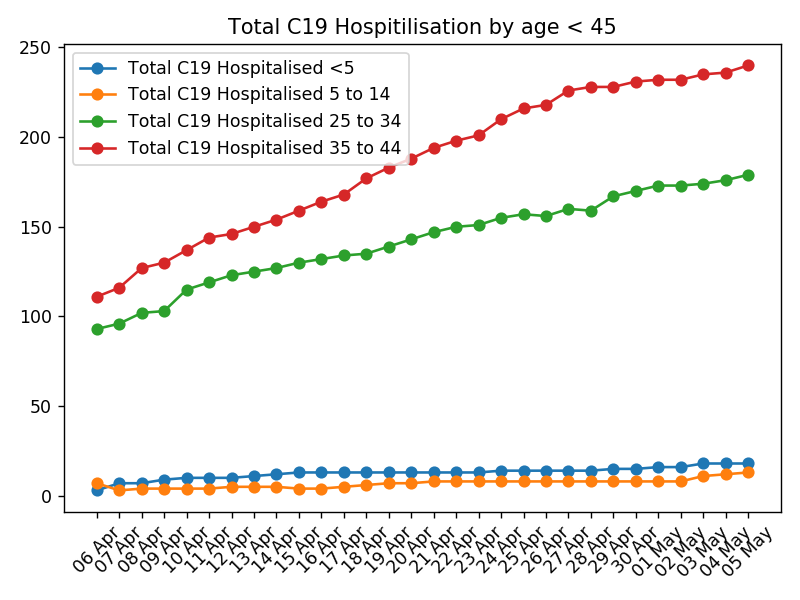

In [202]:
# Total C19 Hospitilisation by age < 45
x = df_hspc['Date']
fig,ax = plt.subplots()
plt.title("Total C19 Hospitilisation by age < 45")
plt.plot(x, df_hspc['HospitalisedAged5'], label='Total C19 Hospitalised <5', marker='o')
plt.plot(x, df_hspc['HospitalisedAged5to14'], label='Total C19 Hospitalised 5 to 14', marker='o')
plt.plot(x, df_hspc["HospitalisedAged25to34"], label='Total C19 Hospitalised 25 to 34', marker='o')
plt.plot(x, df_hspc["HospitalisedAged35to44"], label='Total C19 Hospitalised 35 to 44', marker='o')

monthyearFmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(monthyearFmt)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.legend()
plt.minorticks_off()
plt.tight_layout()
plt.show()
plt.savefig("output/hospatilsation_total_by_age_less_than_45.png")

<IPython.core.display.Javascript object>


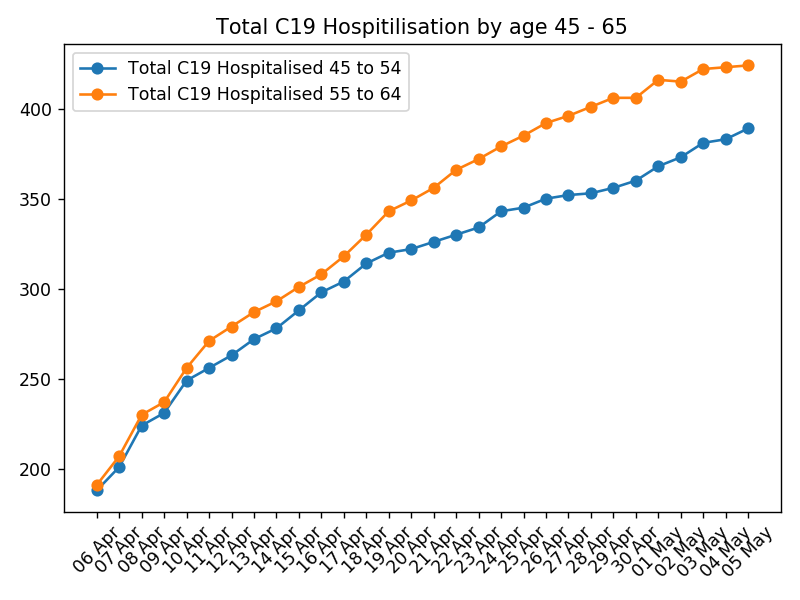

In [203]:
# Total C19 Hospitilisation by age 45 - 65
x = df_hspc['Date']
fig,ax = plt.subplots()
plt.title("Total C19 Hospitilisation by age 45 - 65")
plt.plot(x, df_hspc["HospitalisedAged45to54"], label='Total C19 Hospitalised 45 to 54', marker='o')
plt.plot(x, df_hspc["HospitalisedAged55to64"], label='Total C19 Hospitalised 55 to 64', marker='o')

monthyearFmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(monthyearFmt)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.legend()
plt.minorticks_off()
plt.tight_layout()
plt.show()
plt.savefig("output/hospatilsation_total_by_age_greater_than_45.png")

<IPython.core.display.Javascript object>


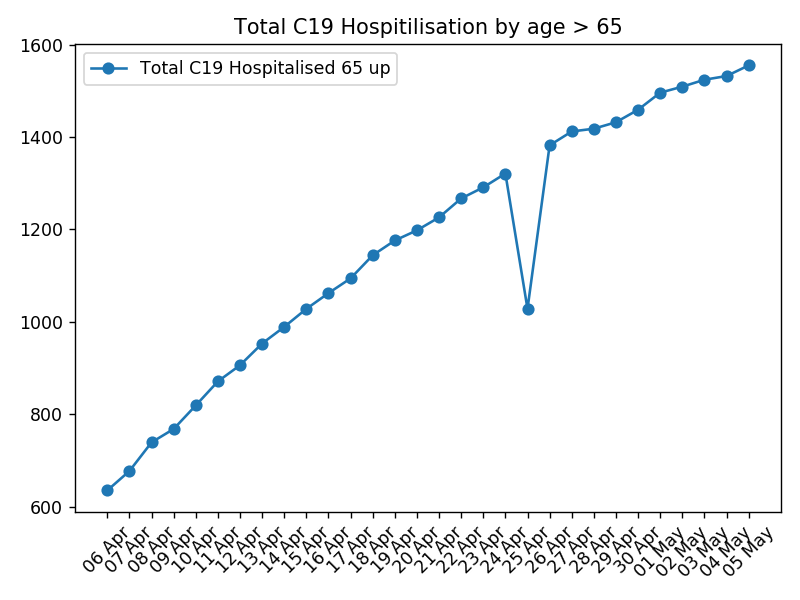

In [204]:
# Total C19 Hospitilisation by age > 65
x = df_hspc['Date']
fig,ax = plt.subplots()
plt.title("Total C19 Hospitilisation by age > 65")
plt.plot(x, df_hspc["HospitalisedAged65up"], label='Total C19 Hospitalised 65 up', marker='o')

monthyearFmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(monthyearFmt)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.legend()
plt.minorticks_off()
plt.tight_layout()
plt.show()
plt.savefig("output/hospatilsation_total_by_age_greater_than_65.png")